In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
import os
import requests

In [ ]:
pdf_path = "your book lcoation"

In [5]:
if not os.path.exists(pdf_path):
  print(f"File doesnt exist at {pdf_path}")

In [6]:
!pip install PyMuPDF
!pip install tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 55.5 MB/s eta 0:00:00


In [7]:
import fitz
from tqdm.auto import tqdm

def text_formatter(text: str) -> str:
    cleaned_text = text.replace("\n", "").strip()
    return cleaned_text

def open_and_read(pdf_path: str) -> list[dict]:
    doc = fitz.open(pdf_path)
    pages_and_texts = []
    for page_number, page in enumerate(tqdm(doc)):
        text_blocks = page.get_text("blocks")
        page_text = ""
        for block in text_blocks:
            page_text += block[4] + " "
        cleaned_text = text_formatter(page_text)
        pages_and_texts.append({
            "page_number": page_number + 1,
            "page_char_count": len(cleaned_text),
            "page_word_count": len(cleaned_text.split(" ")),
            "page_sentence_count_raw": len(cleaned_text.split(". ")),
            "page_token_count": len(cleaned_text) / 4,
            "text": cleaned_text
        })

    return pages_and_texts



pages_and_texts = open_and_read(pdf_path=pdf_path)
print(pages_and_texts[:2])

  0%|          | 0/674 [00:00<?, ?it/s]

[{'page_number': 1, 'page_char_count': 0, 'page_word_count': 1, 'page_sentence_count_raw': 1, 'page_token_count': 0.0, 'text': ''}, {'page_number': 2, 'page_char_count': 409, 'page_word_count': 51, 'page_sentence_count_raw': 3, 'page_token_count': 102.25, 'text': 'Logic and Computer Design Fundamentals Fifth Edition M. Morris ManoCalifornia State University, Los AngelesCharles R. KimeUniversity of Wisconsin, MadisonTom MartinVirginia Tech Boston\u2003 Columbus\u2003 Indianapolis\u2003 New York\u2003 San Francisco\u2003 HobokenAmsterdam\u2003 Cape Town\u2003 Dubai\u2003 London\u2003 Madrid\u2003 Milan\u2003 Munich\u2003 Paris\u2003 Montreal\u2003 Toronto\u2003 Delhi\u2003 Mexico City\u2003 São Paulo\u2003 Sydney\u2003 Hong Kong\u2003 Seoul\u2003 Singapore\u2003 Taipei\u2003 Tokyo'}]


In [8]:
import random

random.sample(pages_and_texts, 2)

[{'page_number': 238,
  'page_char_count': 3469,
  'page_word_count': 609,
  'page_sentence_count_raw': 21,
  'page_token_count': 867.25,
  'text': '4-5 / Sequential Circuit Design\u2003\u2009\u2009\u2009\u2009\u2003 221 inputs as a part of the synchronous circuit design violates the fundamental synchro-nous circuit definition, since it permits a \xadflip-\u200b\xadflop state to change asynchronously within direct clock triggering.Alternatively, the reset may be synchronous and require a \xadclock-\u200b\xadtriggering event to occur. The reset must be incorporated into the synchronous design of the circuit. A simple approach to synchronous reset for D \xadflip-\u200b\xadflops, without formally including the reset bit in the input combinations, is to add the AND gate shown in Figure\xa04-17(b) after doing the normal circuit design. This design also assigns 00 ... 0 to the initial state. If a different initial state code is desired, then OR gates with Reset as an input can selectively re

In [9]:
import pandas as pd
df=  pd.DataFrame(pages_and_texts)
df.head()

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,text
0,1,0,1,1,0.00,
1,2,409,51,3,102.25,Logic and Computer Design Fundamentals Fifth E...
2,3,2786,392,16,696.50,"Copyright © 2015, 2008, 2004 by Pearson Higher..."
3,4,733,89,1,183.25,iii Preface \txii Chapter 1 3 Digital Systems...
4,5,1160,109,1,290.00,iv Contents 2-2\tBoolean Algebra \t4...


In [10]:
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count
count,674.00,674.00,674.00,674.00,674.00
mean,337.50,2283.09,386.63,15.75,570.77
std,194.71,852.57,143.10,7.97,213.14
min,1.00,0.00,1.00,1.00,0.00
25%,169.25,1689.75,293.00,10.00,422.44
50%,337.50,2290.50,393.50,16.00,572.62
75%,505.75,2850.00,496.50,21.00,712.50
max,674.00,4228.00,781.00,56.00,1057.00


###More Text processing (splitting pages into sentences)

In [11]:
from spacy.lang.en import English
nlp = English()
nlp.add_pipe("sentencizer")

doc = nlp("This is the text. That will be shown. If the model is working!")
assert len(list(doc.sents)) == 3

list(doc.sents)

[This is the text., That will be shown., If the model is working!]

In [12]:
for item in tqdm(pages_and_texts):
    item['sentences'] = list(nlp(item['text']).sents)

    #Making sure all teh sentences are strings
    item['sentences'] = [str(sentence) for sentence in item['sentences']]

    #Counting the sentence
    item['page_sentence_count_spacy'] = len(item['sentences'])

  0%|          | 0/674 [00:00<?, ?it/s]

In [13]:
random.sample(pages_and_texts, 1)

[{'page_number': 528,
  'page_char_count': 2740,
  'page_word_count': 471,
  'page_sentence_count_raw': 25,
  'page_token_count': 685.0,
  'text': '9-7 / \xadFloating-\xadPoi nt Computation\u2003\u2009\u2009\u2009\u2009\u2003 511 significant digits. The second method is preferable because it only reduces the precision, whereas the first method may cause an error. The usual alignment procedure is to shift the fraction with the smaller exponent to the right by a number of places equal to the difference between the exponents. After this is done, the fractions can be added:  .5372400 * 102 + .0001580 * 102  .5373980 * 102 When two normalized fractions are added, the sum may contain an overflow digit. An overflow can be corrected by shifting the sum once to the right and incre-menting the exponent. When two numbers are subtracted, the result may contain most significant zeros in the fraction, as shown in the following example:  .56780 * 105 - .56430 * 105  .00350 * 105 A \xadfloating-\u200b

In [14]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy
count,674.00,674.00,674.00,674.00,674.00,674.00
mean,337.50,2283.09,386.63,15.75,570.77,17.34
std,194.71,852.57,143.10,7.97,213.14,8.82
min,1.00,0.00,1.00,1.00,0.00,0.00
25%,169.25,1689.75,293.00,10.00,422.44,11.00
50%,337.50,2290.50,393.50,16.00,572.62,17.50
75%,505.75,2850.00,496.50,21.00,712.50,24.00
max,674.00,4228.00,781.00,56.00,1057.00,47.00


###Chunking

In [15]:
num_sentence_chunk_size = 10

def split_list(input_list: list[str], slice_size: int = num_sentence_chunk_size) -> list[list[str]]:
    return [input_list[i:i+slice_size] for i in range(0, len(input_list), slice_size)]

test_list = list(range(25))
split_list(test_list)


[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24]]

In [16]:
#looping through pages and texts and split them into chunks
for item in tqdm(pages_and_texts):
  item['sentence_chunks'] = split_list(input_list = item['sentences'],
                                       slice_size=num_sentence_chunk_size)
  item['num_chunks'] = len(item['sentence_chunks'])

  0%|          | 0/674 [00:00<?, ?it/s]

In [17]:
random.sample(pages_and_texts, 1)

[{'page_number': 76,
  'page_char_count': 2047,
  'page_word_count': 371,
  'page_sentence_count_raw': 13,
  'page_token_count': 511.75,
  'text': '2-3 / Standard Forms\u2003\u2009\u2009\u2009\u2009\u2003 59 From the table, we obtain the minterms of the function: E(X, Y, Z) = Σm(0, 1, 2, 4, 5) The minterms for the complement of E are given by E(X, Y, Z)  = Σm(3, 6, 7) Note that the total number of minterms in E and E is equal to eight, since the func-tion has three variables, and three variables produce a total of eight minterms. With four variables, there will be a total of 16 minterms, and for two variables, there will be four minterms. An example of a function that includes all the minterms is G(X, Y ) = Σm(0, 1, 2, 3) = 1 Since G is a function of two variables and contains all four minterms, it is always equal to logic 1. Sum of Products The \xadsum-\u200b\xadof-\u200b\xadminterms form is a standard algebraic expression that is obtained direct-ly from a truth table. The expression 

In [18]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy,num_chunks
count,674.00,674.00,674.00,674.00,674.00,674.00,674.00
mean,337.50,2283.09,386.63,15.75,570.77,17.34,2.22
std,194.71,852.57,143.10,7.97,213.14,8.82,0.88
min,1.00,0.00,1.00,1.00,0.00,0.00,0.00
25%,169.25,1689.75,293.00,10.00,422.44,11.00,2.00
50%,337.50,2290.50,393.50,16.00,572.62,17.50,2.00
75%,505.75,2850.00,496.50,21.00,712.50,24.00,3.00
max,674.00,4228.00,781.00,56.00,1057.00,47.00,5.00


In [19]:
import re

pages_and_chunks = []

for item in tqdm(pages_and_texts):
    for sentence_chunks in item['sentence_chunks']:
        chunk_dict = {}
        chunk_dict['page_number'] = item['page_number']

        joined_sentence_chunk = "".join(sentence_chunks).replace("  ", " ").strip()
        joined_sentence_chunk = re.sub(r'\.([A-Z])', r'\1', joined_sentence_chunk)

        chunk_dict['sentence_chunk'] = joined_sentence_chunk

        chunk_dict['chunk_char_count'] = len(joined_sentence_chunk)
        chunk_dict['chunk_word_count'] = len([word for word in joined_sentence_chunk.split(" ")])
        chunk_dict['chunk_token_count'] = len(joined_sentence_chunk) / 4

        pages_and_chunks.append(chunk_dict)

len(pages_and_chunks)

  0%|          | 0/674 [00:00<?, ?it/s]

1494

In [20]:
random.sample(pages_and_chunks, 1)

[{'page_number': 155,
  'sentence_chunk': 'The output for D1 is generated only if all inputs with higher priority are 0, and so on down the priority levelsFrom this, we obtain the remaining rows of the tableThe valid output desig-nated by V is set to 1 only when one or more of the inputs are equal to 1If all inputs \u2002 Table 3-6Truth Table of Priority Encoder InputsOutputs D 3D 2D 1D 0A 1A 0V 0000XX00001001001X01101XX1011XXX111',
  'chunk_char_count': 386,
  'chunk_word_count': 70,
  'chunk_token_count': 96.5}]

In [21]:
df = pd.DataFrame(pages_and_chunks)
df.describe().round(2)

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,1494.00,1494.00,1494.00,1494.00
mean,345.14,1015.05,165.95,253.76
std,194.32,481.10,76.40,120.27
min,2.00,2.00,1.00,0.50
25%,181.00,716.25,116.00,179.06
50%,346.50,1058.50,173.00,264.62
75%,518.00,1298.75,212.00,324.69
max,673.00,4222.00,510.00,1055.50


In [22]:
df.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count
0,2,Logic and Computer Design Fundamentals Fifth E...,409,51,102.25
1,3,"Copyright © 2015, 2008, 2004 by Pearson Higher...",1216,179,304.00
2,3,The author and publisher shall not be liable i...,615,86,153.75
3,3,"Martin, Tom, 1969- III. Title. TK7888.4M36 ...",924,110,231.00
4,4,iii Preface \txii Chapter 1 3 Digital Systems...,732,88,183.00


In [23]:
min_token_length = 30


for _, row in df[df['chunk_token_count'] <= min_token_length].sample(5).iterrows():
    print(f'Chunk token count: {row["chunk_token_count"]} | Text: {row["sentence_chunk"]}')

Chunk token count: 8.5 | Text: This page intentionally left blank
Chunk token count: 13.0 | Text: Tom MartinBlacksburg, Virginia xvi           Preface
Chunk token count: 11.5 | Text: The variable names in true and complement form
Chunk token count: 22.75 | Text: Due to the micro-branch, a NOP is required in BLE5The connections to MUX E require only one
Chunk token count: 22.0 | Text: Both include the specified minterms of the original incompletely specified function, but


In [24]:
pages_and_chunks_over_min_token_len = df[df["chunk_token_count"] > min_token_length].to_dict(orient="records")
pages_and_chunks_over_min_token_len[:2]

[{'page_number': 2,
  'sentence_chunk': 'Logic and Computer Design Fundamentals Fifth Edition M. Morris ManoCalifornia State University, Los AngelesCharles R. KimeUniversity of Wisconsin, MadisonTom MartinVirginia Tech Boston\u2003 Columbus\u2003 Indianapolis\u2003 New York\u2003 San Francisco\u2003 HobokenAmsterdam\u2003 Cape Town\u2003 Dubai\u2003 London\u2003 Madrid\u2003 Milan\u2003 Munich\u2003 Paris\u2003 Montreal\u2003 Toronto\u2003 Delhi\u2003 Mexico City\u2003 São Paulo\u2003 Sydney\u2003 Hong Kong\u2003 Seoul\u2003 Singapore\u2003 Taipei\u2003 Tokyo',
  'chunk_char_count': 409,
  'chunk_word_count': 51,
  'chunk_token_count': 102.25},
 {'page_number': 3,
  'sentence_chunk': 'Copyright © 2015, 2008, 2004 by Pearson Higher Education, Inc., Hoboken, NJ 07030All rights reservedManufactured in the United States of AmericaThis publication is protected by Copyright and permissions should be obtained from the publisher prior to any prohibited reproduction, storage in a retrieval syst

In [25]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [28]:

from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2",
                                      device="cuda") # choose the device to load the model to (note: GPU will often be *much* faster than CPU)

# Create a list of sentences to turn into numbers
sentences = [
    "The Sentences Transformers library provides an easy and open-source way to create embeddings.",
    "Sentences can be embedded one by one or as a list of strings.",
    "Embeddings are one of the most powerful concepts in machine learning!",
    "Learn to use embeddings well and you'll be well on your way to being an AI engineer."
]

# Sentences are encoded/embedded by calling model.encode()
embeddings = embedding_model.encode(sentences)
embeddings_dict = dict(zip(sentences, embeddings))

# See the embeddings
for sentence, embedding in embeddings_dict.items():
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Sentence: The Sentences Transformers library provides an easy and open-source way to create embeddings.
Embedding: [-2.07981113e-02  3.03164795e-02 -2.01218147e-02  6.86483756e-02
 -2.55255271e-02 -8.47689621e-03 -2.07084100e-04 -6.32377341e-02
  2.81606186e-02 -3.33352946e-02  3.02635301e-02  5.30720539e-02
 -5.03526032e-02  2.62288153e-02  3.33314314e-02 -4.51578870e-02
  3.63044329e-02 -1.37113058e-03 -1.20171346e-02  1.14946300e-02
  5.04510924e-02  4.70857024e-02  2.11912952e-02  5.14607318e-02
 -2.03746632e-02 -3.58889513e-02 -6.67892222e-04 -2.94393133e-02
  4.95858938e-02 -1.05639584e-02 -1.52014289e-02 -1.31752621e-03
  4.48197350e-02  1.56022953e-02  8.60380283e-07 -1.21392391e-03
 -2.37978548e-02 -9.09427938e-04  7.34480796e-03 -2.53931968e-03
  5.23369759e-02 -4.68043573e-02  1.66214537e-02  4.71578874e-02
 -4.15599234e-02  9.01929627e-04  3.60278897e-02  3.42214443e-02
  9.68227461e-02  5.94828576e-02 -1.64984558e-02 -3.51249650e-02
  5.92514267e-03 -7.08006672e-04 -2.4103

In [29]:
single_sentence = "Yo! How cool are embeddings?"
single_embedding = embedding_model.encode(single_sentence)
print(f"Sentence: {single_sentence}")
print(f"Embedding:\n{single_embedding}")
print(f"Embedding size: {single_embedding.shape}")

Sentence: Yo! How cool are embeddings?
Embedding:
[-1.97447464e-02 -4.51087253e-03 -4.98483423e-03  6.55444637e-02
 -9.87672526e-03  2.72835493e-02  3.66425887e-02 -3.30221560e-03
  8.50079302e-03  8.24952498e-03 -2.28497107e-02  4.02430221e-02
 -5.75200096e-02  6.33692443e-02  4.43207808e-02 -4.49507460e-02
  1.25284223e-02 -2.52012070e-02 -3.55292521e-02  1.29558714e-02
  8.67023412e-03 -1.92917697e-02  3.55632859e-03  1.89506132e-02
 -1.47128226e-02 -9.39843804e-03  7.64168892e-03  9.62190144e-03
 -5.98927913e-03 -3.90169360e-02 -5.47824726e-02 -5.67456894e-03
  1.11645199e-02  4.08067591e-02  1.76319077e-06  9.15297028e-03
 -8.77261441e-03  2.39382703e-02 -2.32784320e-02  8.04999545e-02
  3.19176726e-02  5.12595009e-03 -1.47708422e-02 -1.62524804e-02
 -6.03213236e-02 -4.35689576e-02  4.51211669e-02 -1.79053992e-02
  2.63367146e-02 -3.47867012e-02 -8.89172684e-03 -5.47674969e-02
 -1.24372719e-02 -2.38606632e-02  8.33496824e-02  5.71242534e-02
  1.13328667e-02 -1.49594946e-02  9.2037

In [30]:
%%time

# Send the model to the GPU
embedding_model.to("cuda") # requires a GPU installed, for reference on my local machine, I'm using a NVIDIA RTX 4090

# Create embeddings one by one on the GPU
for item in tqdm(pages_and_chunks_over_min_token_len):
    item["embedding"] = embedding_model.encode(item["sentence_chunk"])

  0%|          | 0/1454 [00:00<?, ?it/s]

CPU times: user 32.3 s, sys: 280 ms, total: 32.6 s
Wall time: 34.6 s


In [31]:
text_chunks = [item["sentence_chunk"] for item in pages_and_chunks_over_min_token_len]

In [32]:
%%time

# Embed all texts in batches
text_chunk_embeddings = embedding_model.encode(text_chunks,
                                               batch_size=32, # you can use different batch sizes here for speed/performance, I found 32 works well for this use case
                                               convert_to_tensor=True) # optional to return embeddings as tensor instead of array

text_chunk_embeddings

CPU times: user 27 s, sys: 49.1 ms, total: 27 s
Wall time: 26.8 s


tensor([[ 0.0152, -0.0228, -0.0517,  ...,  0.0261,  0.0341, -0.0175],
        [ 0.0442, -0.0455, -0.0384,  ...,  0.0097,  0.0276, -0.0138],
        [-0.0064, -0.0137, -0.0636,  ..., -0.0312,  0.0124, -0.0262],
        ...,
        [-0.0042, -0.0753, -0.0257,  ..., -0.0318, -0.0139, -0.0390],
        [ 0.0222, -0.1035, -0.0293,  ..., -0.0372, -0.0289, -0.0323],
        [-0.0263, -0.0196, -0.0251,  ..., -0.0361, -0.0077,  0.0014]],
       device='cuda:0')

In [33]:
# Save embeddings to file
text_chunks_and_embeddings_df = pd.DataFrame(pages_and_chunks_over_min_token_len)
embeddings_df_save_path = "text_chunks_and_embeddings_df.csv"
text_chunks_and_embeddings_df.to_csv(embeddings_df_save_path, index=False)

In [34]:
text_chunks_and_embedding_df_load = pd.read_csv(embeddings_df_save_path)
text_chunks_and_embedding_df_load.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,2,Logic and Computer Design Fundamentals Fifth E...,409,51,102.25,[ 1.52373575e-02 -2.28480641e-02 -5.16511463e-...
1,3,"Copyright © 2015, 2008, 2004 by Pearson Higher...",1216,179,304.00,[ 4.41669486e-02 -4.54980396e-02 -3.83558422e-...
2,3,The author and publisher shall not be liable i...,615,86,153.75,[-6.42557861e-03 -1.37392804e-02 -6.36309460e-...
3,3,"Martin, Tom, 1969- III. Title. TK7888.4M36 ...",924,110,231.00,[ 4.42545302e-02 7.45570511e-02 -8.29840545e-...
4,4,iii Preface \txii Chapter 1 3 Digital Systems...,732,88,183.00,[-3.91486399e-02 -2.40281224e-02 -6.39230683e-...


In [35]:
import random

import torch
import numpy as np
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"

# Import texts and embedding df
text_chunks_and_embedding_df = pd.read_csv("text_chunks_and_embeddings_df.csv")

# Convert embedding column back to np.array (it got converted to string when it got saved to CSV)
text_chunks_and_embedding_df["embedding"] = text_chunks_and_embedding_df["embedding"].apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))

# Convert texts and embedding df to list of dicts
pages_and_chunks = text_chunks_and_embedding_df.to_dict(orient="records")

# Convert embeddings to torch tensor and send to device (note: NumPy arrays are float64, torch tensors are float32 by default)
embeddings = torch.tensor(np.array(text_chunks_and_embedding_df["embedding"].tolist()), dtype=torch.float32).to(device)
embeddings.shape

torch.Size([1454, 768])

In [36]:
text_chunks_and_embedding_df.head()


,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,2,Logic and Computer Design Fundamentals Fifth E...,409,51,102.25,"[0.0152373575, -0.0228480641, -0.0516511463, -..."
1,3,"Copyright © 2015, 2008, 2004 by Pearson Higher...",1216,179,304.00,"[0.0441669486, -0.0454980396, -0.0383558422, -..."
2,3,The author and publisher shall not be liable i...,615,86,153.75,"[-0.00642557861, -0.0137392804, -0.063630946, ..."
3,3,"Martin, Tom, 1969- III. Title. TK7888.4M36 ...",924,110,231.00,"[0.0442545302, 0.0745570511, -0.00829840545, -..."
4,4,iii Preface \txii Chapter 1 3 Digital Systems...,732,88,183.00,"[-0.0391486399, -0.0240281224, -0.0639230683, ..."


In [37]:
embeddings[0]

tensor([ 1.5237e-02, -2.2848e-02, -5.1651e-02, -2.1669e-02, -4.6753e-02,
        -7.2664e-02,  6.0647e-02, -9.3019e-03,  2.3387e-02, -1.8646e-02,
         7.3493e-02,  2.1701e-02,  3.1981e-02,  8.8017e-02, -4.4361e-02,
        -8.8565e-02,  5.2781e-02, -1.5093e-02, -5.0007e-02, -1.0527e-02,
        -2.6080e-02, -2.1544e-02,  2.5368e-03,  2.4325e-02,  3.1417e-02,
        -4.7229e-02, -3.6286e-02,  3.0092e-02,  3.1329e-03, -2.4387e-02,
        -3.3348e-02,  1.6370e-02, -4.3980e-02,  2.0354e-02,  2.4399e-06,
        -4.0422e-02, -3.1298e-02,  2.5198e-02,  1.9162e-02,  7.1162e-02,
         3.7770e-02,  7.7857e-02, -3.3800e-03,  2.9089e-02,  1.9127e-02,
        -1.0920e-02,  2.2274e-02,  8.2894e-03,  3.9249e-02,  1.9037e-03,
         5.5481e-03,  1.3923e-02, -4.6548e-02,  9.6914e-03, -5.2867e-02,
         1.2799e-02,  1.9863e-02,  2.5492e-02,  6.3290e-02, -2.3569e-02,
        -7.3479e-03, -4.2840e-02, -1.8980e-02, -3.7280e-02,  2.0618e-02,
         7.2954e-04,  6.7483e-03,  2.9779e-02, -1.9

In [38]:
from sentence_transformers import util, SentenceTransformer

embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2",
                                      device=device) # choose the device to load the model to

In [40]:
# 1. Define the query
# Note: This could be anything. But since we're working with a nutrition textbook, we'll stick with nutrition-based queries.
query = "System Design"
print(f"Query: {query}")

# 2. Embed the query to the same numerical space as the text examples
# Note: It's important to embed your query with the same model you embedded your examples with.
query_embedding = embedding_model.encode(query, convert_to_tensor=True)

# 3. Get similarity scores with the dot product (we'll time this for fun)
from time import perf_counter as timer

start_time = timer()
dot_scores = util.dot_score(a=query_embedding, b=embeddings)[0]
end_time = timer()

print(f"Time take to get scores on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

# 4. Get the top-k results (we'll keep this to 5)
top_results_dot_product = torch.topk(dot_scores, k=5)
top_results_dot_product

Query: System Design
Time take to get scores on 1454 embeddings: 0.00019 seconds.


torch.return_types.topk(
values=tensor([0.6420, 0.5999, 0.5718, 0.5549, 0.5435], device='cuda:0'),
indices=tensor([1035, 1148,   16, 1436,   27], device='cuda:0'))

In [41]:
larger_embeddings = torch.randn(100*embeddings.shape[0], 768).to(device)
print(f"Embeddings shape: {larger_embeddings.shape}")

# Perform dot product across 168,000 embeddings
start_time = timer()
dot_scores = util.dot_score(a=query_embedding, b=larger_embeddings)[0]
end_time = timer()

print(f"Time take to get scores on {len(larger_embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

Embeddings shape: torch.Size([145400, 768])
Time take to get scores on 145400 embeddings: 0.02411 seconds.


In [42]:
# Define helper function to print wrapped text
import textwrap

def print_wrapped(text, wrap_length=80):
    wrapped_text = textwrap.fill(text, wrap_length)
    print(wrapped_text)

In [43]:
print(f"Query: '{query}'\n")
print("Results:")
# Loop through zipped together scores and indicies from torch.topk
for score, idx in zip(top_results_dot_product[0], top_results_dot_product[1]):
    print(f"Score: {score:.4f}")
    # Print relevant sentence chunk (since the scores are in descending order, the most relevant chunk will be first)
    print("Text:")
    print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
    # Print the page number too so we can reference the textbook further (and check the results)
    print(f"Page number: {pages_and_chunks[idx]['page_number']}")
    print("\n")

Query: 'System Design'

Results:
Score: 0.6420
Text:
Amsterdam: Elsevier, 2011.2.     Mano, M. M. Computer Engineering: Hardware
DesignEnglewood Cliffs, NJ: Prentice Hall, 1988.3.   Mano,  M.  M.  Computer
System Architecture, 3rd  edEnglewood Cliffs, NJ: Prentice Hall, 1993.4.
Patterson, D. A. and J. L. HennessyComputer Organization and Design: The
Hardware/Software Interface, 5th edAmsterdam: Elsevier, 2013ProblemsThe plus (+)
indicates a more advanced problem and the asterisk (*) indicates that a solution
is available on the Companion Website for the text.8-1.
Page number: 495


Score: 0.5999
Text:
2A and 2B. Intel Corporation, 1997–2006.5.       Mano, M. M. Computer
Engineering: Hardware DesignEnglewood Cliffs, NJ: Prentice Hall, 1988.6.
Mano, M. M. Computer System Architecture, 3rd edEnglewood Cliffs, NJ: Prentice
Hall, 1993.7.    Patterson, D. A. and J. L. HennessyComputer Organization and
Design: The Hardware/Software Interface, 5th edAmsterdam: Elsevier, 2013Problems
The plus (

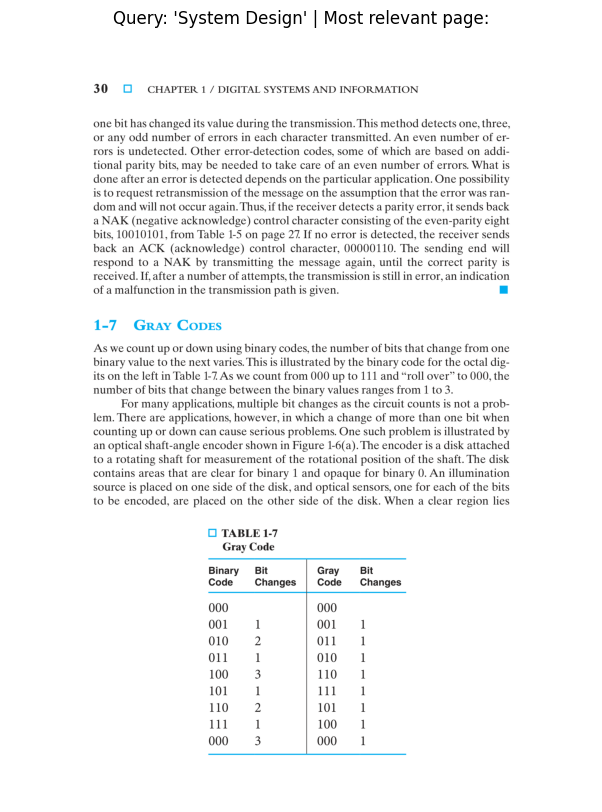

In [ ]:
import fitz


pdf_path = "your book lcoation" 
doc = fitz.open(pdf_path)
page = doc.load_page(5 + 41) 

# Get the image of the page
img = page.get_pixmap(dpi=300)

# Optional: save the image
#img.save("output_filename.png")
doc.close()

# Convert the Pixmap to a numpy array
img_array = np.frombuffer(img.samples_mv,
                          dtype=np.uint8).reshape((img.h, img.w, img.n))

# Display the image using Matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 10))
plt.imshow(img_array)
plt.title(f"Query: '{query}' | Most relevant page:")
plt.axis('off') # Turn off axis
plt.show()

In [46]:
import torch

def dot_product(vector1, vector2):
    return torch.dot(vector1, vector2)

def cosine_similarity(vector1, vector2):
    dot_product = torch.dot(vector1, vector2)

    # Get Euclidean/L2 norm of each vector (removes the magnitude, keeps direction)
    norm_vector1 = torch.sqrt(torch.sum(vector1**2))
    norm_vector2 = torch.sqrt(torch.sum(vector2**2))

    return dot_product / (norm_vector1 * norm_vector2)

# Example tensors
vector1 = torch.tensor([1, 2, 3], dtype=torch.float32)
vector2 = torch.tensor([1, 2, 3], dtype=torch.float32)
vector3 = torch.tensor([4, 5, 6], dtype=torch.float32)
vector4 = torch.tensor([-1, -2, -3], dtype=torch.float32)

# Calculate dot product
print("Dot product between vector1 and vector2:", dot_product(vector1, vector2))
print("Dot product between vector1 and vector3:", dot_product(vector1, vector3))
print("Dot product between vector1 and vector4:", dot_product(vector1, vector4))

# Calculate cosine similarity
print("Cosine similarity between vector1 and vector2:", cosine_similarity(vector1, vector2))
print("Cosine similarity between vector1 and vector3:", cosine_similarity(vector1, vector3))
print("Cosine similarity between vector1 and vector4:", cosine_similarity(vector1, vector4))

Dot product between vector1 and vector2: tensor(14.)
Dot product between vector1 and vector3: tensor(32.)
Dot product between vector1 and vector4: tensor(-14.)
Cosine similarity between vector1 and vector2: tensor(1.0000)
Cosine similarity between vector1 and vector3: tensor(0.9746)
Cosine similarity between vector1 and vector4: tensor(-1.0000)


In [47]:
def retrieve_relevant_resources(query: str,
                                embeddings: torch.tensor,
                                model: SentenceTransformer=embedding_model,
                                n_resources_to_return: int=5,
                                print_time: bool=True):
    """
    Embeds a query with model and returns top k scores and indices from embeddings.
    """

    # Embed the query
    query_embedding = model.encode(query,
                                   convert_to_tensor=True)

    # Get dot product scores on embeddings
    start_time = timer()
    dot_scores = util.dot_score(query_embedding, embeddings)[0]
    end_time = timer()

    if print_time:
        print(f"[INFO] Time taken to get scores on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

    scores, indices = torch.topk(input=dot_scores,
                                 k=n_resources_to_return)

    return scores, indices

def print_top_results_and_scores(query: str,
                                 embeddings: torch.tensor,
                                 pages_and_chunks: list[dict]=pages_and_chunks,
                                 n_resources_to_return: int=5):
    """
    Takes a query, retrieves most relevant resources and prints them out in descending order.

    Note: Requires pages_and_chunks to be formatted in a specific way (see above for reference).
    """

    scores, indices = retrieve_relevant_resources(query=query,
                                                  embeddings=embeddings,
                                                  n_resources_to_return=n_resources_to_return)

    print(f"Query: {query}\n")
    print("Results:")
    # Loop through zipped together scores and indicies
    for score, index in zip(scores, indices):
        print(f"Score: {score:.4f}")
        # Print relevant sentence chunk (since the scores are in descending order, the most relevant chunk will be first)
        print_wrapped(pages_and_chunks[index]["sentence_chunk"])
        # Print the page number too so we can reference the textbook further and check the results
        print(f"Page number: {pages_and_chunks[index]['page_number']}")
        print("\n")

In [48]:
query = "symptoms of pellagra"

# Get just the scores and indices of top related results
scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)
scores, indices

[INFO] Time taken to get scores on 1454 embeddings: 0.00008 seconds.


(tensor([0.0792, 0.0751, 0.0571, 0.0550, 0.0526], device='cuda:0'),
 tensor([1299, 1300, 1298, 1139, 1297], device='cuda:0'))

In [49]:
print_top_results_and_scores(query=query,
                             embeddings=embeddings)

[INFO] Time taken to get scores on 1454 embeddings: 0.00006 seconds.
Query: symptoms of pellagra

Results:
Score: 0.0792
Light passing through a filter called a linear polarizer emerges as waves that
propagate in a single plane that aligns with the axis of the polarizerIn Figure
11-3(b), beginning at the back of the display, light waves that vibrate in
various directions are produced by the backlight panelThe light passes through a
linear polarizer with a vertical axis of
Page number: 606


Score: 0.0751
590           CHAPTER 11 / Input–Output and Communication polarization on the
back of the rear substrateAll light emitted from the polarizer has its waves
vibrating in the direction of the polarization axis, i.e., verticallyThe
molecules at the rear of the liquid crystal are likewise oriented
verticallyOptically, a liquid crystal layer causes the plane of polarization of
light to align with the orienta-tion of its molecules around the axis of
rotationThe liquid crystal helix rotates th

In [50]:
# Get GPU available memory
import torch
gpu_memory_bytes = torch.cuda.get_device_properties(0).total_memory
gpu_memory_gb = round(gpu_memory_bytes / (2**30))
print(f"Available GPU memory: {gpu_memory_gb} GB")

Available GPU memory: 15 GB


In [51]:
# Note: the following is Gemma focused, however, there are more and more LLMs of the 2B and 7B size appearing for local use.
if gpu_memory_gb < 5.1:
    print(f"Your available GPU memory is {gpu_memory_gb}GB, you may not have enough memory to run a Gemma LLM locally without quantization.")
elif gpu_memory_gb < 8.1:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in 4-bit precision.")
    use_quantization_config = True
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb < 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in float16 or Gemma 7B in 4-bit precision.")
    use_quantization_config = False
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb > 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommend model: Gemma 7B in 4-bit or float16 precision.")
    use_quantization_config = False
    model_id = "google/gemma-7b-it"

print(f"use_quantization_config set to: {use_quantization_config}")
print(f"model_id set to: {model_id}")

GPU memory: 15 | Recommended model: Gemma 2B in float16 or Gemma 7B in 4-bit precision.
use_quantization_config set to: False
model_id set to: google/gemma-2b-it


In [53]:
!pip install bitsandbytes accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 10.2 MB/s eta 0:00:00


In [55]:
!pip install flash-attn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 40.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for flash-attn: filename=flash_attn-2.7.4.post1-cp311-cp311-linux_x86_64.whl size=187815463 sha256=d944fc7d2f962bce83fc4708c2fc0c21eaf8255962a0b350ae919362a51b7ef2
  Stored in directory: /root/.cache/pip/wheels/3d/88/d8/284b89f56af7d5bf366b10d6b8e251ac8a7c7bf3f04203fb4f
Successfully built flash-attn


In [ ]:
!pip install huggingface_hub

!pip install bitsandbytes accelerate
!pip install flash-attn


from huggingface_hub import login
login(token = 'hugging face token')

# Run the rest of the code
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers.utils import is_flash_attn_2_available

# 1. Create quantization config for smaller model loading (optional)
# Requires !pip install bitsandbytes accelerate, see: https://github.com/TimDettmers/bitsandbytes, https://huggingface.co/docs/accelerate/
# For models that require 4-bit quantization (use this if you have low GPU memory available)
from transformers import BitsAndBytesConfig
quantization_config = BitsAndBytesConfig(load_in_4bit=True,
                                         bnb_4bit_compute_dtype=torch.float16)

# Bonus: Setup Flash Attention 2 for faster inference, default to "sdpa" or "scaled dot product attention" if it's not available
# Flash Attention 2 requires NVIDIA GPU compute capability of 8.0 or above, see: https://developer.nvidia.com/cuda-gpus
# Requires !pip install flash-attn, see: https://github.com/Dao-AILab/flash-attention
if (is_flash_attn_2_available()) and (torch.cuda.get_device_capability(0)[0] >= 8):
  attn_implementation = "flash_attention_2"
else:
  attn_implementation = "sdpa"
print(f"[INFO] Using attention implementation: {attn_implementation}")

# 2. Pick a model we'd like to use (this will depend on how much GPU memory you have available)
#model_id = "google/gemma-7b-it"
model_id = model_id # (we already set this above)
print(f"[INFO] Using model_id: {model_id}")

# 3. Instantiate tokenizer (tokenizer turns text into numbers ready for the model)
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_id)

# 4. Instantiate the model
llm_model = AutoModelForCausalLM.from_pretrained(pretrained_model_name_or_path=model_id,
                                                 torch_dtype=torch.float16, # datatype to use, we want float16
                                                 quantization_config=quantization_config if use_quantization_config else None,
                                                 low_cpu_mem_usage=False, # use full memory
                                                 attn_implementation=attn_implementation) # which attention version to use

if not use_quantization_config: # quantization takes care of device setting automatically, so if it's not used, send model to GPU
    llm_model.to("cuda")

[INFO] Using attention implementation: sdpa
[INFO] Using model_id: google/gemma-2b-it


tokenizer_config.json:   0%|          | 0.00/34.2k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/627 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/67.1M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

In [61]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers.utils import is_flash_attn_2_available

# 1. Create quantization config for smaller model loading (optional)
# Requires !pip install bitsandbytes accelerate, see: https://github.com/TimDettmers/bitsandbytes, https://huggingface.co/docs/accelerate/
# For models that require 4-bit quantization (use this if you have low GPU memory available)
from transformers import BitsAndBytesConfig
quantization_config = BitsAndBytesConfig(load_in_4bit=True,
                                         bnb_4bit_compute_dtype=torch.float16)

# Bonus: Setup Flash Attention 2 for faster inference, default to "sdpa" or "scaled dot product attention" if it's not available
# Flash Attention 2 requires NVIDIA GPU compute capability of 8.0 or above, see: https://developer.nvidia.com/cuda-gpus
# Requires !pip install flash-attn, see: https://github.com/Dao-AILab/flash-attention
if (is_flash_attn_2_available()) and (torch.cuda.get_device_capability(0)[0] >= 8):
  attn_implementation = "flash_attention_2"
else:
  attn_implementation = "sdpa"
print(f"[INFO] Using attention implementation: {attn_implementation}")

# 2. Pick a model we'd like to use (this will depend on how much GPU memory you have available)
#model_id = "google/gemma-7b-it"
model_id = model_id # (we already set this above)
print(f"[INFO] Using model_id: {model_id}")

# 3. Instantiate tokenizer (tokenizer turns text into numbers ready for the model)
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_id)

# 4. Instantiate the model
llm_model = AutoModelForCausalLM.from_pretrained(pretrained_model_name_or_path=model_id,
                                                 torch_dtype=torch.float16, # datatype to use, we want float16
                                                 quantization_config=quantization_config if use_quantization_config else None,
                                                 low_cpu_mem_usage=False, # use full memory
                                                 attn_implementation=attn_implementation) # which attention version to use

if not use_quantization_config: # quantization takes care of device setting automatically, so if it's not used, send model to GPU
    llm_model.to("cuda")

[INFO] Using attention implementation: sdpa
[INFO] Using model_id: google/gemma-2b-it


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [62]:
llm_model


GemmaForCausalLM(
  (model): GemmaModel(
    (embed_tokens): Embedding(256000, 2048, padding_idx=0)
    (layers): ModuleList(
      (0-17): 18 x GemmaDecoderLayer(
        (self_attn): GemmaAttention(
          (q_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (k_proj): Linear(in_features=2048, out_features=256, bias=False)
          (v_proj): Linear(in_features=2048, out_features=256, bias=False)
          (o_proj): Linear(in_features=2048, out_features=2048, bias=False)
        )
        (mlp): GemmaMLP(
          (gate_proj): Linear(in_features=2048, out_features=16384, bias=False)
          (up_proj): Linear(in_features=2048, out_features=16384, bias=False)
          (down_proj): Linear(in_features=16384, out_features=2048, bias=False)
          (act_fn): GELUActivation()
        )
        (input_layernorm): GemmaRMSNorm((2048,), eps=1e-06)
        (post_attention_layernorm): GemmaRMSNorm((2048,), eps=1e-06)
      )
    )
    (norm): GemmaRMSNorm((2048,), 

In [63]:
def get_model_num_params(model: torch.nn.Module):
    return sum([param.numel() for param in model.parameters()])

get_model_num_params(llm_model)

2506172416

In [64]:
def get_model_mem_size(model: torch.nn.Module):
    """
    Get how much memory a PyTorch model takes up.

    See: https://discuss.pytorch.org/t/gpu-memory-that-model-uses/56822
    """
    # Get model parameters and buffer sizes
    mem_params = sum([param.nelement() * param.element_size() for param in model.parameters()])
    mem_buffers = sum([buf.nelement() * buf.element_size() for buf in model.buffers()])

    # Calculate various model sizes
    model_mem_bytes = mem_params + mem_buffers # in bytes
    model_mem_mb = model_mem_bytes / (1024**2) # in megabytes
    model_mem_gb = model_mem_bytes / (1024**3) # in gigabytes

    return {"model_mem_bytes": model_mem_bytes,
            "model_mem_mb": round(model_mem_mb, 2),
            "model_mem_gb": round(model_mem_gb, 2)}

get_model_mem_size(llm_model)

{'model_mem_bytes': 5012345344, 'model_mem_mb': 4780.15, 'model_mem_gb': 4.67}

In [65]:
input_text = input("Please enter question: ")
print(f"Input text:\n{input_text}")

# Create prompt template for instruction-tuned model
dialogue_template = [
    {"role": "user",
     "content": input_text}
]

# Apply the chat template
prompt = tokenizer.apply_chat_template(conversation=dialogue_template,
                                       tokenize=False, # keep as raw text (not tokenized)
                                       add_generation_prompt=True)
print(f"\nPrompt (formatted):\n{prompt}")

Please enter question: whats the Edge-Triggered Flip-Flop
Input text:
whats the Edge-Triggered Flip-Flop

Prompt (formatted):
<bos><start_of_turn>user
whats the Edge-Triggered Flip-Flop<end_of_turn>
<start_of_turn>model



In [66]:
%%time

# Tokenize the input text (turn it into numbers) and send it to GPU
input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")
print(f"Model input (tokenized):\n{input_ids}\n")

# Generate outputs passed on the tokenized input
# See generate docs: https://huggingface.co/docs/transformers/v4.38.2/en/main_classes/text_generation#transformers.GenerationConfig
outputs = llm_model.generate(**input_ids,
                             max_new_tokens=256) # define the maximum number of new tokens to create
print(f"Model output (tokens):\n{outputs[0]}\n")

Model input (tokenized):
{'input_ids': tensor([[     2,      2,    106,   1645,    108,  91560,    573,  15231, 235290,
         171660,  45219, 235290, 231127,    107,    108,    106,   2516,    108]],
       device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
       device='cuda:0')}

Model output (tokens):
tensor([     2,      2,    106,   1645,    108,  91560,    573,  15231, 235290,
        171660,  45219, 235290, 231127,    107,    108,    106,   2516,    108,
           688,  17520, 235290, 171660,  45219, 235290, 231127,    688,    109,
          1969,   8541, 235290, 125292,  24740, 235290, 134146,    603,    476,
          1916,    576,  24740, 235290, 134146,    674,   4559,   2329,   3482,
           611,    573,  12068,    576,    476,   3821,   3772,   9402, 235269,
          3151,    573,  14711,   9402, 235265,   1417,   1916,    576,  24740,
        235290, 134146,    603,  17203,   1671,    575,   6403,  37451,   1570,


In [67]:
# Decode the output tokens to text
outputs_decoded = tokenizer.decode(outputs[0])
print(f"Model output (decoded):\n{outputs_decoded}\n")

Model output (decoded):
<bos><bos><start_of_turn>user
whats the Edge-Triggered Flip-Flop<end_of_turn>
<start_of_turn>model
**Edge-Triggered Flip-Flop**

An edge-triggered flip-flop is a type of flip-flop that changes state based on the transition of a single input signal, called the trigger signal. This type of flip-flop is commonly used in digital circuits where a single event triggers a change in the output state.

**Working Principle:**

1. **Input Pulse:** When a trigger pulse is applied to the trigger input, it briefly sets the flip-flop to a high state.
2. **Set-up Phase:** After the trigger pulse, the flip-flop remains in the high state until a clock pulse is received.
3. **Reset Pulse:** When a clock pulse is applied, the flip-flop resets to its low state.
4. **Output Response:** If the trigger pulse is applied again before the clock pulse, the flip-flop will return to the high state. This process is repeated in a cycle.

**Advantages:**

* Simple and easy to implement.
* Can b

In [68]:
print(f"Input text: {input_text}\n")
print(f"Output text:\n{outputs_decoded.replace(prompt, '').replace('<bos>', '').replace('<eos>', '')}")

Input text: whats the Edge-Triggered Flip-Flop

Output text:
**Edge-Triggered Flip-Flop**

An edge-triggered flip-flop is a type of flip-flop that changes state based on the transition of a single input signal, called the trigger signal. This type of flip-flop is commonly used in digital circuits where a single event triggers a change in the output state.

**Working Principle:**

1. **Input Pulse:** When a trigger pulse is applied to the trigger input, it briefly sets the flip-flop to a high state.
2. **Set-up Phase:** After the trigger pulse, the flip-flop remains in the high state until a clock pulse is received.
3. **Reset Pulse:** When a clock pulse is applied, the flip-flop resets to its low state.
4. **Output Response:** If the trigger pulse is applied again before the clock pulse, the flip-flop will return to the high state. This process is repeated in a cycle.

**Advantages:**

* Simple and easy to implement.
* Can be triggered by a single input pulse.
* Robust against noise an

In [76]:
# Nutrition-style questions generated with GPT4
gpt4_questions = [
    "What do you knwo about SR and SR latches?",
    "Whats happening in the pages of the 204 and 205",
    "whats the main concept in the pages of the 304 and 305",
    "Whats your opinion in the page in the page 208 and 209",
    "Explain the concept of Standard Graphic symbols"
]

# Manually created question list
manual_questions = [
    "I want learn abut stuff in the page in the page 406",
    "Whats the Binary Adder-subtractor",
    "How does the full adders work",
    "What is the Multiplexer-Based Combinational Circuits",
    "Whats the priorit encoder?"
]

query_list = gpt4_questions + manual_questions

In [77]:
import random
query = random.choice(query_list)

print(f"Query: {query}")

# Get just the scores and indices of top related results
scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)
scores, indices

Query: Whats the Binary Adder-subtractor
[INFO] Time taken to get scores on 1454 embeddings: 0.00007 seconds.


(tensor([0.7713, 0.7669, 0.7654, 0.7325, 0.7255], device='cuda:0'),
 tensor([369, 364, 373, 365, 357], device='cuda:0'))

In [88]:
def prompt_formatter(query: str,
                     context_items: list[dict]) -> str:
    """
    Augments query with text-based context from context_items.
    """
    # Join context items into one dotted paragraph
    context = "- " + "\n- ".join([item["sentence_chunk"] for item in context_items])

    # Create a base prompt with examples to help the model
    # Note: this is very customizable, I've chosen to use 3 examples of the answer style we'd like.
    # We could also write this in a txt file and import it in if we wanted.
    base_prompt = """Based on the following context items, please answer the query.
Give yourself room to think by extracting relevant passages from the context before answering the query.
Don't return the thinking, only return the answer.
Make sure your answers are as explanatory as possible.
Use the following examples as reference for the ideal answer style.
\nNow use the following context items to answer the user query:
{context}
\nRelevant passages: <extract relevant passages from the context here>
User query: {query}
Answer:"""

    # Update base prompt with context items and query
    base_prompt = base_prompt.format(context=context, query=query)

    # Create prompt template for instruction-tuned model
    dialogue_template = [
        {"role": "user",
        "content": base_prompt}
    ]

    # Apply the chat template
    prompt = tokenizer.apply_chat_template(conversation=dialogue_template,
                                          tokenize=False,
                                          add_generation_prompt=True)
    return prompt

In [79]:
query = random.choice(query_list)
print(f"Query: {query}")

# Get relevant resources
scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)

# Create a list of context items
context_items = [pages_and_chunks[i] for i in indices]

# Format prompt with context items
prompt = prompt_formatter(query=query,
                          context_items=context_items)
print(prompt)

Query: How does the full adders work
[INFO] Time taken to get scores on 1454 embeddings: 0.00006 seconds.
<bos><start_of_turn>user
Based on the following context items, please answer the query.
Give yourself room to think by extracting relevant passages from the context before answering the query.
Don't return the thinking, only return the answer.
Make sure your answers are as explanatory as possible.
Use the following examples as reference for the ideal answer style.

Example 1:
Query: What are the fat-soluble vitamins?
Answer: The fat-soluble vitamins include Vitamin A, Vitamin D, Vitamin E, and Vitamin K. These vitamins are absorbed along with fats in the diet and can be stored in the body's fatty tissue and liver for later use. Vitamin A is important for vision, immune function, and skin health. Vitamin D plays a critical role in calcium absorption and bone health. Vitamin E acts as an antioxidant, protecting cells from damage. Vitamin K is essential for blood clotting and bone met

In [82]:
def ask(query,
        temperature=0.7,
        max_new_tokens=512,
        format_answer_text=True,
        return_answer_only=True):
    """
    Takes a query, finds relevant resources/context and generates an answer to the query based on the relevant resources.
    """

    # Get just the scores and indices of top related results
    scores, indices = retrieve_relevant_resources(query=query,
                                                  embeddings=embeddings)

    # Create a list of context items
    context_items = [pages_and_chunks[i] for i in indices]

    # Add score to context item
    for i, item in enumerate(context_items):
        item["score"] = scores[i].cpu() # return score back to CPU

    # Format the prompt with context items
    prompt = prompt_formatter(query=query,
                              context_items=context_items)

    # Tokenize the prompt
    input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

    # Generate an output of tokens
    outputs = llm_model.generate(**input_ids,
                                 temperature=temperature,
                                 do_sample=True,
                                 max_new_tokens=max_new_tokens)

    # Turn the output tokens into text
    output_text = tokenizer.decode(outputs[0])

    if format_answer_text:
        # Replace special tokens and unnecessary help message
        output_text = output_text.replace(prompt, "").replace("<bos>", "").replace("<eos>", "").replace("Sure, here is the answer to the user query:\n\n", "")

    # Only return the answer without the context items
    if return_answer_only:
        return output_text

    return output_text, context_items

In [83]:
%%time

input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

# Generate an output of tokens
outputs = llm_model.generate(**input_ids,
                             temperature=0.7, # lower temperature = more deterministic outputs, higher temperature = more creative outputs
                             do_sample=True, # whether or not to use sampling, see https://huyenchip.com/2024/01/16/sampling.html for more
                             max_new_tokens=256) # how many new tokens to generate from prompt

# Turn the output tokens into text
output_text = tokenizer.decode(outputs[0])

print(f"Query: {query}")
print(f"RAG answer:\n{output_text.replace(prompt, '')}")

Query: How does the full adders work
RAG answer:
<bos>The passage does not provide any information about how the full adders work, so I cannot answer this question from the provided context.<eos>
CPU times: user 1.34 s, sys: 2.1 ms, total: 1.34 s
Wall time: 1.34 s


In [87]:
query = random.choice(query_list)
print(f"Query: {query}")

# Answer query with context and return context
answer, context_items = ask(query=query,
                            temperature=0.7,
                            max_new_tokens=512,
                            return_answer_only=False)

print(f"Answer:\n")
print_wrapped(answer)
print(f"Context items:")
context_items

Query: What is the Multiplexer-Based Combinational Circuits
[INFO] Time taken to get scores on 1454 embeddings: 0.00009 seconds.
Answer:

Sure, here is the answer to the user's query:  The passage does not provide any
information about the Multiplexer-Based Combinational Circuits, so I cannot
extract the requested data from the context.
Context items:


[{'page_number': 159,
  'sentence_chunk': '142\u2009\u2009\u2009\u2009\u2003\u2009\u2009\u2009\u2009\u2003 CHAPTER 3 / Combinational Logic\xa0Design This implementation can be constructed by combining a 2–to–4-line decoder, four AND gates used as enabling circuits, and a 4-input OR gate, as shown in Figure 3-25We will refer to the combination of AND gates and OR gates as an m * 2 AND-OR, where m is the number of AND gates and 2 is the number of inputs to the AND gatesThis resulting circuit has a gate input cost of 22, which is more costlyNevertheless, it provides a structural basis for construct-ing larger n–to–2n-line multiplexers by expansionA multiplexer is also called a data selector, since it selects one of many infor-mation inputs and steers the binary information to the output lineThe term “multi-plexer” is often abbreviated as “MUX.”Multiplexers can be expanded by considering vectors of input bits for larger values of n. Expansion is based upon the circuit structure given in Fi